In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [2]:
# !pip install tensorflow

In [3]:
df=pd.read_csv(r'Z:\CHANDRA MOULI B VS R\2021-2022\BUSINESS PROJECTS\NOVEMBER\TK12938 CREDIT CARD FRAUD DETECTION USING MACHINE LEARNING\SOURCE CODE YMTS-0420\DATA SET\creditcard.csv')

In [4]:
df.shape

(284807, 31)

In [5]:
df=df.sample(frac=0.3)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
107163,70309.0,-0.382608,0.947206,1.691947,0.434948,-0.037888,-0.589335,0.612458,0.073153,-0.686599,...,0.080359,0.143413,-0.164020,0.488813,-0.011482,-0.507221,0.066454,0.055978,2.49,0
3240,2800.0,1.220318,-0.042804,0.714912,-0.133098,-0.788829,-0.802845,-0.268293,-0.060892,0.044871,...,-0.061198,-0.183541,0.101129,0.612228,0.076245,0.872267,-0.071596,0.002977,5.37,0
166539,118143.0,2.106341,-0.778178,-1.183580,-0.723059,-0.734125,-0.546742,-1.051381,0.059385,-0.061946,...,0.267587,0.800949,0.065660,-0.513824,-0.177062,-0.079558,0.022887,-0.026706,19.95,0
155629,105934.0,1.968633,-0.470783,-1.628310,-0.592380,1.899461,3.743100,-1.170932,0.926723,2.441717,...,-0.264293,-0.512595,0.394943,0.583637,-0.354341,-0.943201,0.050438,-0.037977,11.27,0
259189,159007.0,-5.892008,-7.133221,0.197904,1.813522,7.040782,-4.055840,-4.009626,0.212156,0.746039,...,-0.073299,0.169854,-0.656184,0.389210,-0.465689,-0.169486,0.837680,0.157256,187.13,0


In [7]:
# df[df['']]

In [8]:
df.isnull().sum()#2

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,...,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000
mean,94547.340336,-0.007446,0.001947,0.001525,0.000275,-0.003181,0.000917,0.001719,-0.004465,-0.006161,...,-0.000124,-0.003030,-0.001896,-0.000969,-0.000025,0.000629,-0.001443,-0.001501,89.225025,0.001779
std,47500.108986,1.959400,1.654424,1.513054,1.418487,1.366378,1.326638,1.233693,1.245126,1.107008,...,0.753481,0.727757,0.613281,0.604429,0.520524,0.482108,0.404876,0.331808,244.102846,0.042141
min,0.000000,-56.407510,-72.715728,-32.454198,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-32.828995,-2.836627,-8.696627,-2.241620,-22.565679,-11.710896,0.000000,0.000000
25%,54005.250000,-0.923742,-0.597661,-0.893144,-0.850581,-0.696756,-0.765780,-0.551039,-0.209630,-0.655801,...,-0.229946,-0.546288,-0.162468,-0.356602,-0.315440,-0.327647,-0.071660,-0.053116,5.510000,0.000000
50%,84358.000000,0.012192,0.065162,0.185660,-0.018344,-0.052685,-0.271314,0.043161,0.021248,-0.054549,...,-0.030211,0.001681,-0.011724,0.041637,0.016816,-0.050943,0.000663,0.011607,22.025000,0.000000
75%,139269.000000,1.307721,0.809902,1.026276,0.743686,0.608675,0.395036,0.570013,0.327049,0.590747,...,0.185630,0.525843,0.146453,0.437120,0.351002,0.241486,0.089928,0.078403,78.000000,0.000000
max,172792.000000,2.412720,22.057729,9.382558,16.491217,34.801666,22.529298,36.677268,19.168327,15.594995,...,27.202839,10.503090,17.768462,4.014444,5.852484,3.067907,12.152401,33.847808,11789.840000,1.000000


In [10]:
df.info()#3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85442 entries, 107163 to 75185
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    85442 non-null  float64
 1   V1      85442 non-null  float64
 2   V2      85442 non-null  float64
 3   V3      85442 non-null  float64
 4   V4      85442 non-null  float64
 5   V5      85442 non-null  float64
 6   V6      85442 non-null  float64
 7   V7      85442 non-null  float64
 8   V8      85442 non-null  float64
 9   V9      85442 non-null  float64
 10  V10     85442 non-null  float64
 11  V11     85442 non-null  float64
 12  V12     85442 non-null  float64
 13  V13     85442 non-null  float64
 14  V14     85442 non-null  float64
 15  V15     85442 non-null  float64
 16  V16     85442 non-null  float64
 17  V17     85442 non-null  float64
 18  V18     85442 non-null  float64
 19  V19     85442 non-null  float64
 20  V20     85442 non-null  float64
 21  V21     85442 non-null  float6

In [11]:
df.Class.value_counts()

0    85290
1      152
Name: Class, dtype: int64

In [12]:
df.Class.value_counts()*100/df.shape[0]

0    99.822102
1     0.177898
Name: Class, dtype: float64

In [13]:
# !pip install seaborn

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

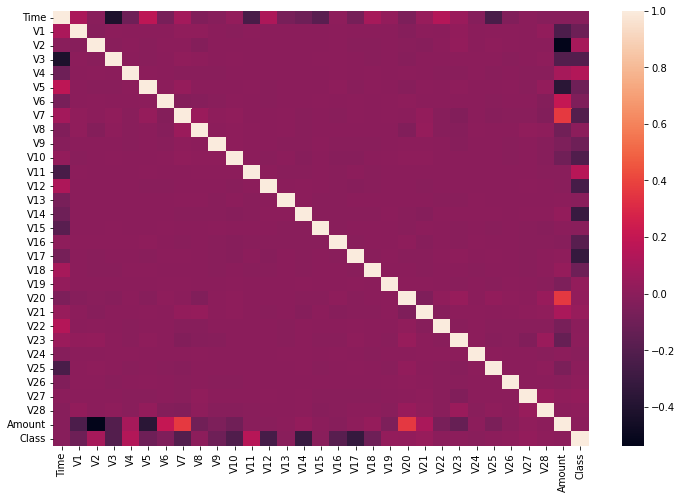

In [15]:
plt.figure(figsize=(12,8))#4
sns.heatmap(df.corr()) # Heatmap of correlation between columns of ‘df’.

# Algorithms

In [16]:
from sklearn.metrics import accuracy_score, classification_report, recall_score,precision_score
from sklearn.model_selection import train_test_split


In [17]:
X=df.drop(['Class'],axis=1)
y=df.Class

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
X_test.shape

(25633, 30)

In [59]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
192814,129861.0,-0.269660,0.312709,0.392943,-0.592287,0.262810,1.428176,-0.517639,1.020955,0.458956,...,-0.410663,0.457986,1.503370,0.161326,-1.314958,-1.061195,0.612621,0.019614,-0.026213,12.99
87076,61528.0,1.197534,-0.282696,0.311995,-0.146669,-0.282471,0.175044,-0.391227,0.096543,0.515870,...,0.025315,-0.167788,-0.561442,0.006376,-0.886595,0.055261,0.908591,-0.053409,0.009644,50.99
158468,111296.0,1.791378,-0.494993,-1.073690,0.544328,0.167658,0.211289,-0.217308,-0.059904,1.760831,...,0.044248,-0.089158,-0.172521,0.099925,0.191802,-0.225332,0.154041,-0.093246,-0.046722,124.90
239385,150085.0,-0.865930,-0.908236,-0.004228,-0.349912,2.668875,0.290483,-0.076703,0.139302,-0.052554,...,-0.082846,-0.111517,-0.106735,0.168330,-1.609389,-1.104362,0.218380,-0.176885,-0.011509,9.99
37501,38983.0,1.062990,0.287169,0.802472,2.527032,-0.159516,0.335426,-0.084090,0.140065,-0.560312,...,-0.058111,-0.234771,-0.672097,-0.003557,-0.025221,0.384857,-0.181200,-0.000477,0.019982,41.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53604,46066.0,-6.428474,4.776089,-1.349781,-0.878455,-1.685644,-1.348752,-0.248102,0.958499,2.403686,...,1.269077,-0.743293,-1.824342,0.249441,0.255810,0.685370,-0.190488,-0.545176,0.481628,4.25
149120,90631.0,-0.244347,1.710891,0.634045,2.935377,0.891129,-0.072653,1.394038,-0.388674,-0.576223,...,-0.310411,0.185175,0.738516,-0.160196,-0.060827,-0.148065,-0.004069,-0.215937,0.011080,67.58
208563,137172.0,-1.644147,0.233266,1.953632,0.955745,-0.024668,0.182269,-0.768501,0.919966,-0.194545,...,0.302595,0.152775,0.142587,-0.303602,-0.384377,0.373661,-0.436179,0.257688,-0.051389,17.00
118338,75042.0,1.184960,0.167625,0.468725,0.580127,-0.281259,-0.502450,0.023871,-0.085029,-0.002033,...,-0.072716,-0.216591,-0.617740,0.148533,0.089864,0.147990,0.120958,-0.014075,0.019256,18.65


# SVC

In [60]:
classifier = SVC(random_state=10)  
classifier.fit(X_train, y_train) 

SVC(random_state=10)

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
svmc = accuracy_score(y_test, y_pred)
psvmc = precision_score(y_test, y_pred)
rsvmc= recall_score(y_test,y_pred)
print(svmc)
print(psvmc)
print(rsvmc)

0.9982444505130106
0.0
0.0


c:\program files\python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.ensemble import RandomForestClassifier  

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y_preds= rf.predict(X_test)  

In [66]:
rfc = accuracy_score(y_test,y_preds)
prfc= precision_score(y_test, y_preds)
rrfc = recall_score(y_test,y_preds)
print(rfc)
print(prfc)
print(rrfc)

0.9993758046268482
0.8717948717948718
0.7555555555555555


In [67]:
from sklearn.tree import DecisionTreeClassifier 

In [75]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [76]:
asd =dt.predict(X_test)

In [77]:
dtc = accuracy_score(y_test,asd)
pdtc= precision_score(y_test, asd)
rdtc = recall_score(y_test,asd)
print(dtc)
print(pdtc)
print(rdtc)

0.9992587679943823
0.782608695652174
0.8


In [78]:
from sklearn.neighbors import KNeighborsClassifier  

In [83]:
knnc = KNeighborsClassifier(n_neighbors=2)
knnc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [84]:
knnp= knnc.predict(X_test)

In [85]:
knna = accuracy_score(y_test,knnp)
pknna= precision_score(y_test, knnp)
rknna = recall_score(y_test,knnp)
print(knna)
print(pknna)
print(rknna)

0.9982834627238325
0.6666666666666666
0.044444444444444446


In [86]:
graph = pd.DataFrame({'Models':['SVM','Random Forest','DecisionTree','Knn'],'Accuracy':[svmc*100,rfc*100,dtc*100,knna*100],'Precision':[psvmc*100,prfc*100,pdtc*100,pknna*100],
                      'Recall':[rsvmc*100,rrfc*100,rdtc*100,rknna*100]})
graph

,Models,Accuracy,Precision,Recall
0,SVM,99.824445,0.000000,0.000000
1,Random Forest,99.937580,87.179487,75.555556
2,DecisionTree,99.925877,78.260870,80.000000
3,Knn,99.828346,66.666667,4.444444


In [87]:
Accuracy= [svmc*100,rfc*100,dtc*100,knna*100]
Accuracy

[99.82444505130105, 99.93758046268482, 99.92587679943823, 99.82834627238326]

In [88]:
Precision=[psvmc*100,prfc*100,pdtc*100,pknna*100]
Precision

[0.0, 87.17948717948718, 78.26086956521739, 66.66666666666666]

In [89]:
Recall=[rsvmc*100,rrfc*100,rdtc*100,rknna*100]
Recall

[0.0, 75.55555555555556, 80.0, 4.444444444444445]

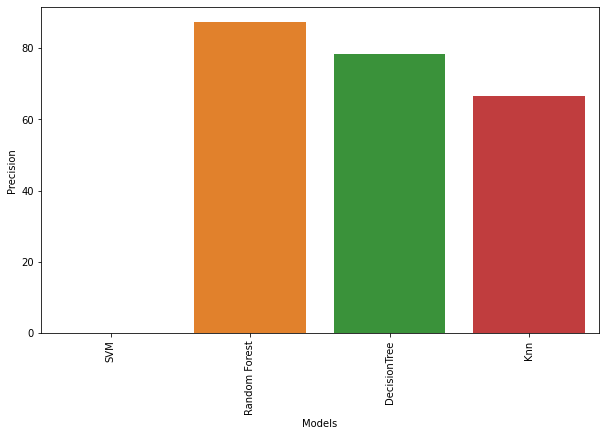

In [90]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph.Precision,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()

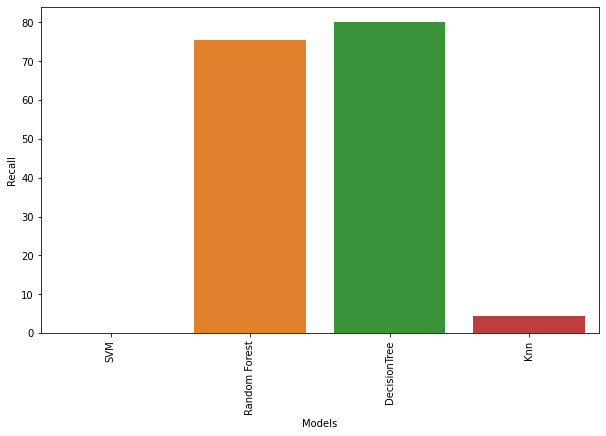

In [91]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph.Recall,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()

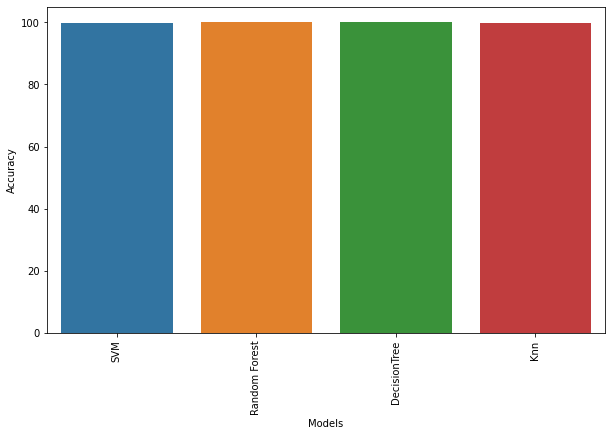

In [92]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph.Accuracy,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()

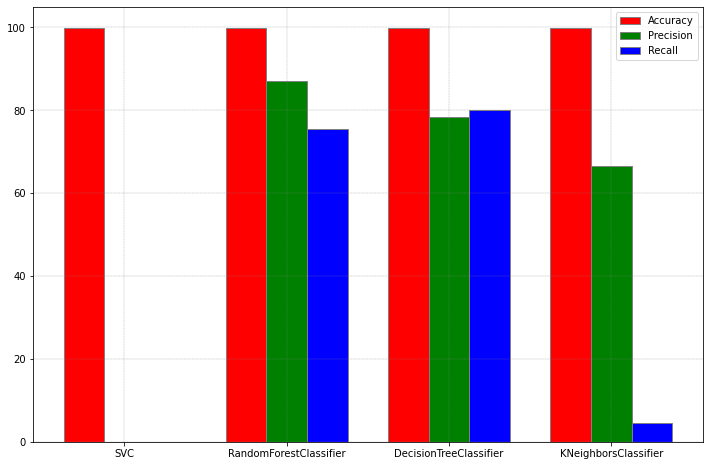

In [93]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Accuracy= [svmc*100,rfc*100,dtc*100,knna*100]
Precision=[psvmc*100,prfc*100,pdtc*100,pknna*100]
Recall=[rsvmc*100,rrfc*100,rdtc*100,rknna*100]
 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Accuracy, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Precision, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br3, Recall, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall')
 
# Adding Xticks
# plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
# plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)


plt.xticks([r + barWidth for r in range(len(Accuracy))],['SVC', 'RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.legend()
plt.show()

# ANN

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [95]:
x_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

In [96]:
x_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [97]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [98]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
model.fit(X_train, y_train, batch_size=500, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
120/120 [==============================] - 1s 3ms/step - loss: 3062.3591 - accuracy: 0.0018 - val_loss: 11.0848 - val_accuracy: 0.0018
Epoch 2/5
120/120 [==============================] - 0s 1ms/step - loss: 10.5138 - accuracy: 0.0018 - val_loss: 10.2413 - val_accuracy: 0.0018
Epoch 3/5
120/120 [==============================] - ETA: 0s - loss: 9.9908 - accuracy: 0.0018     - 0s 1ms/step - loss: 9.5644 - accuracy: 0.0018 - val_loss: 9.1454 - val_accuracy: 0.0018
Epoch 4/5
120/120 [==============================] - 0s 1ms/step - loss: 8.4086 - accuracy: 0.0018 - val_loss: 7.8871 - val_accuracy: 0.0018
Epoch 5/5
120/120 [==============================] - 0s 2ms/step - loss: 7.0827 - accuracy: 0.0018 - val_loss: 6.4624 - val_accuracy: 0.0018


In [100]:
abc=model.predict(X_test)
# abc=np.argmax([model.precict_classes(X_test)])

In [101]:
acc =accuracy_score(abc,y_test)*100
acc

0.17555494869894275

In [102]:
df[df['Class']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
107163,70309.0,-0.382608,0.947206,1.691947,0.434948,-0.037888,-0.589335,0.612458,0.073153,-0.686599,...,0.080359,0.143413,-0.164020,0.488813,-0.011482,-0.507221,0.066454,0.055978,2.49,0
3240,2800.0,1.220318,-0.042804,0.714912,-0.133098,-0.788829,-0.802845,-0.268293,-0.060892,0.044871,...,-0.061198,-0.183541,0.101129,0.612228,0.076245,0.872267,-0.071596,0.002977,5.37,0
166539,118143.0,2.106341,-0.778178,-1.183580,-0.723059,-0.734125,-0.546742,-1.051381,0.059385,-0.061946,...,0.267587,0.800949,0.065660,-0.513824,-0.177062,-0.079558,0.022887,-0.026706,19.95,0
155629,105934.0,1.968633,-0.470783,-1.628310,-0.592380,1.899461,3.743100,-1.170932,0.926723,2.441717,...,-0.264293,-0.512595,0.394943,0.583637,-0.354341,-0.943201,0.050438,-0.037977,11.27,0
259189,159007.0,-5.892008,-7.133221,0.197904,1.813522,7.040782,-4.055840,-4.009626,0.212156,0.746039,...,-0.073299,0.169854,-0.656184,0.389210,-0.465689,-0.169486,0.837680,0.157256,187.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179743,124224.0,-0.850294,0.564348,-0.558859,-0.584259,0.777521,-1.842088,0.543574,0.213921,-0.089183,...,0.348747,0.647274,-0.268899,-0.055721,0.219443,-0.239125,-0.079482,-0.097005,18.36,0
7761,10820.0,1.161761,-0.196479,1.452584,0.455138,-1.142185,-0.169109,-0.855188,0.083913,1.981777,...,-0.200189,-0.155091,0.083476,0.555640,0.047534,0.888950,-0.059419,0.002949,6.00,0
236195,148705.0,-1.739427,-1.295940,1.116197,-0.433753,0.739740,-0.348478,0.801885,-0.124216,0.591736,...,-0.237659,-0.100130,1.316304,-0.498673,-0.286907,-1.001364,0.149664,-0.215256,139.96,0
3909,3488.0,1.113660,-0.351455,0.889274,-0.309445,-0.915219,-0.240188,-0.579115,0.169108,0.262476,...,-0.017808,-0.130940,0.157308,0.286478,-0.205600,1.232844,-0.077588,0.003847,34.99,0


In [103]:
df[df['Class']==1].iloc[:,10:21]

,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
131272,0.269562,1.293418,0.933216,-0.135326,0.521484,0.386884,0.059869,0.306339,0.265052,0.223718,0.732852
77348,-4.881143,2.255147,-4.686387,0.652375,-6.174288,0.594380,-4.849692,-6.536521,-3.119094,1.715494,0.560478
167305,0.566680,4.315076,-4.938284,-1.105710,-8.490813,1.003626,-1.949123,-3.093013,0.124087,0.886747,-1.118687
199896,-3.739659,1.738124,-2.844449,0.765864,-4.799737,-0.011335,-2.693168,-3.166955,-1.067800,-0.559132,2.908374
189878,-2.297734,1.961481,-1.944441,-0.692559,-4.346348,-1.726929,-1.820405,-3.746490,-0.880399,0.267915,-2.642902
...,...,...,...,...,...,...,...,...,...,...,...
238466,0.398155,0.613868,-0.022561,0.452018,-2.969201,-0.964967,2.464450,0.671241,1.921021,-1.616927,-0.085579
42700,-13.386683,7.605559,-13.351815,0.827050,-14.979477,1.532813,-11.771497,-20.299217,-7.609110,3.809136,0.520732
215984,-5.112971,2.945621,-4.102127,-0.477203,-4.350434,0.000716,-5.037449,-8.078010,-3.457981,0.596696,0.285559
234632,-3.202436,1.991361,-3.986416,0.577207,-8.485795,-0.794782,-0.666134,-1.372629,-0.104313,-1.466911,0.313332


In [104]:
s = [[60308.0,-0.957317,-3.729433,-1.130661,1.100066,-1.717646,-0.533478,1.488717,-0.349142,0.091474,-0.498225,1.111167,0.204622,-1.676933,0.960795,-0.286044,0.070022,0.007324,0.111324,0.159097,2.118664,0.647212,-0.694610,-1.055408,0.652652,0.015249,0.944112,-0.323468,0.179406,1142.00]]

In [105]:
d = [[14152.0,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,11.152491,-16.558197,0.302645,-17.475921,-0.412393,-10.222203,-13.799148,-5.008585,1.162026,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00]]

In [106]:
asdf = rf.predict(d) 
asdf

array([1], dtype=int64)

In [59]:
# pd.set_option("display.max_columns", 50)